<a href="https://colab.research.google.com/github/onnnnn/INTRODUCTION-AND-PRACTICUM-OF-DEEP-LEARNING-IN-MACHINE-LEARNING/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2 (Logistic Regression)



*   Due Date: 03-11-2021, before the following lesson is proceeded.
*   Format: in IPython Notebook form, submit in Moodle submission module, name the file as follow: HW1_(Your name)_(Student ID).
*   Succinct Reasoning, Codes and Output Presentation are prerequisite, and the marks would be allocated in grades. 
*   Make sure the layout is nice and tidy for my and your own sake.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Question 1: Data Visualization (TMDB 5000 Movie Dataset)
https://www.kaggle.com/tmdb/tmdb-movie-metadata

1.   Compile the codes below and briefly explain the function of the codes given.

```
from ast import literal_eval 
df["genres"] = df["genres"].apply(literal_eval)
df["genres"].head(n = 5)
df["genres"] = df["genres"].apply(
    lambda genres_list: [i["name"] for i in genres_list])
```

```
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
genres_dummy = pd.DataFrame(mlb.fit_transform(df["genres"]), 
                            columns = mlb.classes_, index=df.index)

genres_dummy.head()
```

```
df["genres"].head()
```

2.   Plot a bar plot to tell the `average revenue` of the movies under each `genres`.

In [ ]:
current_path = os.getcwd()
tmdb_path = f'{os.path.abspath(os.path.join(current_path, os.pardir))}/hw1/hw1_archive/tmdb_5000_movies.csv'
df = pd.read_csv(tmdb_path)
df['genres'][0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

###### 1. Compile the codes below and briefly explain the function of the codes given.

In [ ]:
from ast import literal_eval 
df["genres"] = df["genres"].apply(literal_eval)
df["genres"][0]

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [ ]:
df["genres"] = df["genres"].apply(
    lambda genres_list: [i["name"] for i in genres_list])
df['genres'].head(2)

0    [Action, Adventure, Fantasy, Science Fiction]
1                     [Adventure, Fantasy, Action]
Name: genres, dtype: object

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
genres_dummy = pd.DataFrame(mlb.fit_transform(df["genres"]), 
                            columns = mlb.classes_, index=df.index)

genres_dummy.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
df["genres"].head()

0    [Action, Adventure, Fantasy, Science Fiction]
1                     [Adventure, Fantasy, Action]
2                       [Action, Adventure, Crime]
3                 [Action, Crime, Drama, Thriller]
4             [Action, Adventure, Science Fiction]
Name: genres, dtype: object

###### 2. Plot a bar plot to tell the `average revenue` of the movies under each `genres`.

In [ ]:
# counting total revenue & average revenue by each genre
genres_dict = {}
for genres_list, revenue in zip(df.genres, df.revenue):
    for genre in genres_list:
        if genre not in genres_dict:
            genres_dict[genre] = {'count': 1,
                                  'total': revenue,
                                  'avg_revenue': revenue}
        elif genre in genres_dict:
            genres_dict[genre]['count'] += 1
            genres_dict[genre]['total'] += revenue
            genres_dict[genre]['avg_revenue'] = genres_dict[genre]['total'] / genres_dict[genre]['count']

In [ ]:
# sort `genres_dict` by `avg_revenue`
from operator import getitem
genres_dict = {k: v for k, v in sorted(genres_dict.items(), 
                                       key=lambda x: getitem(x[1],'avg_revenue'), 
                                       reverse=True)}

<BarContainer object of 20 artists>

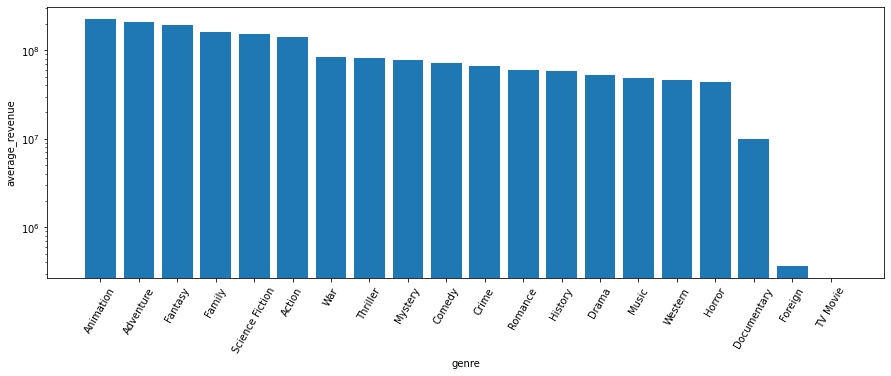

In [ ]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=60)
plt.xlabel('genre')
plt.ylabel('average_revenue')
plt.yscale(value='log')
plt.bar(list(genres_dict.keys()), [genres_dict[genre]['avg_revenue']
                                   for genre in genres_dict.keys()])

# Question 2: Linear Regression (Airline Passenger Satisfaction)

https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction

There're 2 csv files within. `train.csv` is for fitting the model while `test.csv` is for validating.

1.   Rename all the variables with the replacement of space( ) to underscore(_).
2.   Convert the value in `satisfaction` as 
`{'neutral or dissatisfied':0, 'satisfied':1}`
3.   Perform a **LASSO-Penalised Regression** with: **5-fold cross validate** your models and tell the **parameter C** for the Ridge Regulariser with the optimum performance. Show the **line chart** of the model accuracy with respect to the parameter C (with or without Log-transformation) to validate your optimum-C opted. 
```
x = df.loc[:,'Flight_Distance':'Cleanliness']
y = df['satisfaction']
```
4.   Evaluate your model with R-square and MSE.  Validate with 'test.csv' 

In [ ]:
train_path = f'{os.path.abspath(os.path.join(current_path, os.pardir))}/hw1/hw1_archive/train.csv'
test_path = f'{os.path.abspath(os.path.join(current_path, os.pardir))}/hw1/hw1_archive/test.csv'
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

###### 1. Rename all the variables with the replacement of space( ) to underscore(_).

In [ ]:
from typing import TypeVar
DataFrame = TypeVar('pd.core.frame.DataFrame')

def transform_col_name(dataframe: DataFrame) -> dict:
    transform_dict = {}
    for col in dataframe.columns:
        if ' ' in col:
            transform_dict[col] = col.replace(' ', '_')
    return transform_dict

In [ ]:
train.rename(columns = transform_col_name(train), inplace = True)
test.rename(columns = transform_col_name(test), inplace = True)

###### 2. Convert the value in `satisfaction` as `{'neutral or dissatisfied':0, 'satisfied':1}`

In [ ]:
train['satisfaction'] = train['satisfaction'].replace({'neutral or dissatisfied':0,'satisfied':1})
test['satisfaction'] = test['satisfaction'].replace({'neutral or dissatisfied':0,'satisfied':1})

###### 3. Perform a **LASSO-Penalised Regression** with: **5-fold cross validate** your models and tell the **parameter C** for the Ridge Regulariser with the optimum performance. 
- Show the **line chart** of the model accuracy with respect to the parameter C (with or without Log-transformation) to validate your optimum-C opted. 
```
x = df.loc[:,'Flight_Distance':'Cleanliness']
y = df['satisfaction']
```

In [ ]:
x_train = train.loc[:, 'Flight_Distance': 'Cleanliness']
y_train = train['satisfaction']

In [ ]:
from sklearn import linear_model
alphas_grid = np.logspace(-100, 0, num=100)
lasso_cv = linear_model.LassoCV(alphas=alphas_grid, 
                                fit_intercept=True, 
                                normalize=True, 
                                max_iter=10000, 
                                tol=0.001, 
                                cv=5, 
                                random_state=48, 
                                n_jobs=-1)
lasso_cv_fitted = lasso_cv.fit(x_train, y_train)

/Users/zionn/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3338.1835277612026, tolerance: 20.42275389779096
  model = cd_fast.enet_coordinate_descent_gram(
/Users/zionn/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5516.335513761642, tolerance: 20.42275389779096
  model = cd_fast.enet_coordinate_descent_gram(
/Users/zionn/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3315.373096143971, tolerance: 20.402061667649168
  model = cd_fast.enet_coordinate_descent_gram(
/Users/zionn/opt/anacon

/Users/zionn/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5911.932372464917, tolerance: 20.397458008011956
  model = cd_fast.enet_coordinate_descent_gram(
/Users/zionn/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5892.491065269248, tolerance: 20.40569770099715
  model = cd_fast.enet_coordinate_descent_gram(
/Users/zionn/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5945.105535176144, tolerance: 20.42275389779096
  model = cd_fast.enet_coordinate_descent_gram(
/Users/zionn/opt/anacond

/Users/zionn/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5892.491065269298, tolerance: 20.40569770099715
  model = cd_fast.enet_coordinate_descent_gram(
/Users/zionn/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5911.932372464902, tolerance: 20.397458008011956
  model = cd_fast.enet_coordinate_descent_gram(
/Users/zionn/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5892.440668377843, tolerance: 20.428318588116326
  model = cd_fast.enet_coordinate_descent_gram(
/Users/zionn/opt/anacon

/Users/zionn/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5892.491065269283, tolerance: 20.40569770099715
  model = cd_fast.enet_coordinate_descent_gram(
/Users/zionn/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5904.433995580761, tolerance: 20.402061667649168
  model = cd_fast.enet_coordinate_descent_gram(
/Users/zionn/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5911.932372464931, tolerance: 20.397458008011956
  model = cd_fast.enet_coordinate_descent_gram(
/Users/zionn/opt/anacon

/Users/zionn/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5911.932372464924, tolerance: 20.397458008011956
  model = cd_fast.enet_coordinate_descent_gram(
/Users/zionn/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5945.105535176124, tolerance: 20.42275389779096
  model = cd_fast.enet_coordinate_descent_gram(
/Users/zionn/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5892.440668377827, tolerance: 20.428318588116326
  model = cd_fast.enet_coordinate_descent_gram(
/Users/zionn/opt/anacon

/Users/zionn/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5904.433995580743, tolerance: 20.402061667649168
  model = cd_fast.enet_coordinate_descent_gram(
/Users/zionn/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5892.49106526926, tolerance: 20.40569770099715
  model = cd_fast.enet_coordinate_descent_gram(
/Users/zionn/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5892.440668377752, tolerance: 20.428318588116326
  model = cd_fast.enet_coordinate_descent_gram(
/Users/zionn/opt/anacond

In [ ]:
alpha_best = lasso_cv_fitted.alpha_
alpha_best

3.2745491628777316e-49

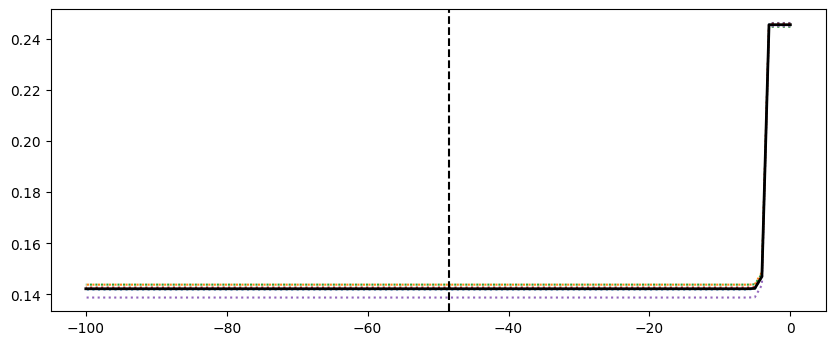

In [ ]:
log_alphas_grid = np.log10(lasso_cv_fitted.alphas_)
ax = plt.figure(figsize=(10, 4), dpi=100)
ax = plt.plot(log_alphas_grid, lasso_cv_fitted.mse_path_, ':')
ax = plt.plot(log_alphas_grid, lasso_cv_fitted.mse_path_.mean(axis=-1), 'k', label='Average across the folds', linewidth=2)
ax = plt.axvline(np.log10(alpha_best), linestyle='--', color='k', label='alpha: CV estimate')

###### 4. Evaluate your model with R-square and MSE.  Validate with 'test.csv' 

In [ ]:
x_test = test.loc[:,'Flight_Distance':'Cleanliness']
y_test = test['satisfaction']
y_hat_test = lasso_cv_fitted.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
print('Performance on Testing Data')
print('  + mean squared error: %.2f' % mean_squared_error(y_test, y_hat_test))
print('  + coefficient of determination: %.2f' % r2_score(y_test, y_hat_test))

Performance on Testing Data
  + mean squared error: 0.14
  + coefficient of determination: 0.42


# Question 3: Multinomial Logistic Regression (Fashion-MNIST)

This is a built-in dataset in `keras`, for more information, check out 

https://github.com/zalandoresearch/fashion-mnist

1.   Tell the shape of your input data.

2.   Perform a **Ridge-Penalised** Multinomial Logistic Regression.  **5-fold cross validate** your models and tell the **parameter C for the Ridge Regulariser with the optimum performance**. Show the **line chart** of the model accuracy with respect to the parameter C (with or without Log-transformation) to justify your optimum-C opted.

*** I'm afraid that you're maybe unable to have conducted such a 'hectic' calculation on your PC (you're taking your PC's toll on its calculating power).  So, here the remedies you may apply once you're unable to obtain a converged solution:

i. Reduce the number of samples in your training set (within a reasonable range).

ii. Increase the `max_iter`.

iii. Decrease the `tol`, but never below 0.01. 


3.   Evaluate your model with `accuracy`.

4.   Show the `confusion matrix` of your model.

5.   Compile the codes given below and **BRIEFLY** explain the function.

```
from sklearn.decomposition import PCA
pca = PCA(n_components=30)
pca.fit(train_images_2d)
x_train = pca.transform(train_images_2d)
x_test = pca.transform(test_images_2d)
```
Hint: Principle Component Analysis works to **reduce the dimension** of your input data.

6.   Perform a **Ridge-Penalised** Multinomial Logistic Regression again with the **dimentionally-reduced data** under the **previous setting**.  Evaluate your model with `accuracy`.

load dataset

In [ ]:
import tensorflow as tf
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

standardize

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

visualize

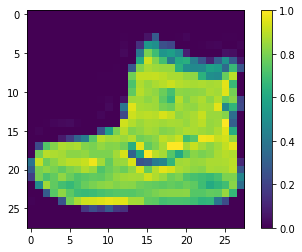

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

Flatten the 3D-Tensor to 2D-Matrix

In [ ]:
train_images_2d = train_images.reshape(60000, -1)
test_images_2d = test_images.reshape(10000, -1)

###### 1. Tell the shape of your input data.

In [ ]:
train_images_2d.shape

(60000, 784)

###### 2. Perform a Ridge-Penalised Multinomial Logistic Regression. 5-fold cross validate your models and tell the parameter C for the Ridge Regulariser with the optimum performance. 

Show the line chart of the model accuracy with respect to the parameter C (with or without Log-transformation) to justify your optimum-C opted.

In [ ]:
c_grid = np.logspace(-7, 1, num = 10) # define values for grid search
lr_cv = linear_model.LogisticRegressionCV(Cs = c_grid, 
                                          fit_intercept = True, 
                                          refit = True, 
                                          cv = 5, # k-fold
                                          penalty = 'l2', # ridge
                                          solver = 'saga', # dont bother to change this
                                          tol = 0.001, # tolerance (learning rate?) never over 0.01
                                          max_iter = 1000, 
                                          random_state = 48, 
                                          n_jobs = -1)

In [ ]:
%%time
lr_cv_fitted = lr_cv.fit(train_images_2d, train_labels)

CPU times: user 1h 39min 38s, sys: 20.9 s, total: 1h 39min 59s
Wall time: 23min 57s


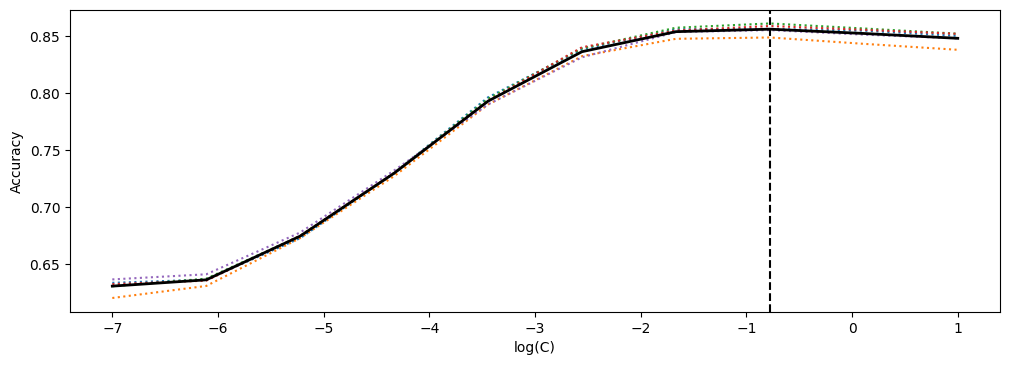

In [ ]:
log_c_grid = np.log10(c_grid); c_best = float(lr_cv.C_[0])
ax = plt.figure(figsize = (12, 4), dpi = 100)
ax = plt.plot(log_c_grid , lr_cv_fitted.scores_[0].transpose(), ':')
ax = plt.plot(log_c_grid , lr_cv_fitted.scores_[0].mean(axis=0), 'k', label = 'Average across the folds', linewidth = 2)
ax = plt.axvline(np.log10(c_best), linestyle = '--', color = 'k')
ax = plt.xlabel('log(C)'); ax = plt.ylabel('Accuracy')

*** I'm afraid that you're maybe unable to have conducted such a 'hectic' calculation on your PC (you're taking your PC's toll on its calculating power). So, here the remedies you may apply once you're unable to obtain a converged solution:

i. Reduce the number of samples in your training set (within a reasonable range).
ii. Increase the max_iter.
iii. Decrease the tol, but never below 0.01.

###### 3. Evaluate your model with accuracy.

In [ ]:
from sklearn.metrics import accuracy_score
y_hat_train = lr_cv_fitted.predict(train_images_2d)
y_hat_test = lr_cv_fitted.predict(test_images_2d)
print('Performance on Training Data')
print('  + accuracy: %.2f' % accuracy_score(train_labels, y_hat_train))
print('Performance on Testing Data')
print('  + accuracy: %.2f' % accuracy_score(test_labels, y_hat_test))

Performance on Training Data
  + accuracy: 0.88
Performance on Testing Data
  + accuracy: 0.85


###### 4. Show the confusion matrix of your model.

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels, y_hat_test)

array([[810,   2,  15,  51,   3,   3, 106,   0,  10,   0],
       [  4, 955,   4,  27,   5,   0,   3,   0,   2,   0],
       [ 25,   3, 737,  14, 124,   1,  82,   1,  13,   0],
       [ 26,  12,  17, 873,  27,   0,  39,   0,   6,   0],
       [  0,   1, 112,  35, 765,   0,  79,   0,   8,   0],
       [  1,   0,   0,   1,   0, 925,   0,  48,   4,  21],
       [137,   2, 122,  39, 100,   1, 575,   0,  24,   0],
       [  0,   0,   0,   0,   0,  29,   0, 943,   0,  28],
       [  6,   1,   7,  11,   2,   5,  22,   6, 940,   0],
       [  0,   1,   0,   0,   0,  15,   1,  40,   0, 943]])

###### 5. Compile the codes given below and BRIEFLY explain the function.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=30)
pca.fit(train_images_2d)
x_train = pca.transform(train_images_2d)
x_test = pca.transform(test_images_2d)

主成分分析（PCA）：減少線性維度的方法（在縮減特徵的數量的同時，也盡可能保留資料中的variance）

to do：把所有在2D space上的特徵（observation points）投影到1D的主成分上

trade off：會遺失在第二主成分上所能得到的資訊

`n_components`參數會回傳該數量的特徵數（要怎麼知道選多少特徵數是別的問題）

step：先產生一個特定特徵數的`PCA`，再對training data & testing data做套入，可得到縮減特徵維度後的training data & testing data

###### 6. Perform a **Ridge-Penalised** Multinomial Logistic Regression again with the **dimentionally-reduced data** under the **previous setting**.  Evaluate your model with `accuracy`.

In [ ]:
c_grid = np.logspace(-7, 1, num = 10) # define values for grid search
lr_cv = linear_model.LogisticRegressionCV(Cs = c_grid, 
                                          fit_intercept = True, 
                                          refit = True, 
                                          cv = 5, # k-fold
                                          penalty = 'l2', # ridge
                                          solver = 'saga', # dont bother to change this
                                          tol = 0.001, # tolerance (learning rate?) never over 0.01
                                          max_iter = 1000, 
                                          random_state = 48, 
                                          n_jobs = -1)

In [ ]:
%%time
lr_cv_fitted = lr_cv.fit(x_train, train_labels)

CPU times: user 2min 6s, sys: 477 ms, total: 2min 6s
Wall time: 27.9 s


In [ ]:
from sklearn.metrics import accuracy_score
y_hat_train = lr_cv_fitted.predict(x_train)
y_hat_test = lr_cv_fitted.predict(x_test)
print('Performance on Training Data')
print('  + accuracy: %.2f' % accuracy_score(train_labels, y_hat_train))
print('Performance on Testing Data')
print('  + accuracy: %.2f' % accuracy_score(test_labels, y_hat_test))

Performance on Training Data
  + accuracy: 0.83
Performance on Testing Data
  + accuracy: 0.81


# Question 4: Interpretation of the regression coefficients in logistic regression

In logistic regression, the probability of $y$ given $x$ is modeled as
$$
\mathbb{P}(y=1|x) = \frac{\exp(w_0+\sum_{p=1}^P w_p x_p)}{1+\exp(w_0+\sum_{p=1}^P w_p x_p)},
$$
and
$$
\mathbb{P}(y=0|x) = \frac{1}{1+\exp(w_0+\sum_{p=1}^P w_p x_p)},
$$

1. Consider the case of $P=1$ and $x$ is a dummy variable, i.e., $x \in \{0,1\}$. Please show that the log-odds ratio under $x=1$ and $x=0$ is $w_1$, i.e.,
$$
\log{ \left( \frac{\mathbb{P}(y=1|x=1)/\mathbb{P}(y=0|x=1)}{\mathbb{P}(y=1|x=0)/\mathbb{P}(y=0|x=0)} \right)}=w_1
$$

###### Answer:

Odds of $y=1$ given $x=1$:
$$
\frac{\mathbb{P}(y=1|x=1)}{\mathbb{P}(y=0|x=1)}
$$
$$
= \exp(w_0+\sum_{p=1}^P w_p x_p)
$$
$$
= \exp(w_0 + w_1) \because P = 1, x = 1
$$

Odds of $y=1$ given $x=0$:
$$
\frac{\mathbb{P}(y=1|x=0)}{\mathbb{P}(y=0|x=0)}
$$
$$
= \exp(w_0+\sum_{p=1}^P w_p x_p)
$$
$$
= \exp(w_0) \because P = 1, x = 0
$$

Regrading the **Left-hand side** of the equation,

$$
LHS
$$
$$
= \log{ \left( \frac{\mathbb{P}(y=1|x=1)/\mathbb{P}(y=0|x=1)}{\mathbb{P}(y=1|x=0)/\mathbb{P}(y=0|x=0)} \right)}
$$
$$
= \log{\left( \frac{\exp(w_0 + w_1)}{\exp(w_0)} \right)}
$$
$$
= \log{(\exp(w_0 + w_1)) - \log(\exp(w_0))}
$$
$$
= w_0 + w_1 + w_0
$$
$$
= w_1
$$
$$
= RHS \therefore proved
$$

# Question 5: Heading towards nonparametric modelling

Statistical Modeling The Two Cultures - L.Breiman 

(https://projecteuclid.org/journals/statistical-science/volume-16/issue-3/Statistical-Modeling--The-Two-Cultures-with-comments-and-a/10.1214/ss/1009213726.full)

Read the paper and **BRIEFLY** summarize the content **in structure**.

You can do it in **point form**, in **paragraphs** (it doesn't really matter to me) but please make it short and concise (few sentences will do, that you can **explain to your peers within minutes in the elevator**).


###### answer:
two contrasting approaches to modeling in statistics:

- data modeling:
    - choose a simple (linear) model based on intuition about the data-generating mechanism
    - emphasis is on model interpretability and validation

- algorithmic modeling:
    - choose the model with the highest predictive validation accuracy with no consideration for model explainability

statisticians may need to stop relying solely on data modeling - which leads to "misleading conclusions" and "irrelevant theory" - and embrace algorithmic modeling to solve novel real-world problems arising from massive data sets

he claims data models were not up to solving new challenges from large-scale data collection

- mdoels with different features often yield similar predictive accuracy
- there is trade-off in machine learning between model interpretability and performance
- more features can improve the performance of complex algorithmic models
- science evolves from simple models to complex models as we gather more information about the world

focus first on model accuracy, and only after building a high-performance model think about explaining it
a highly-complex, accurate model that cant be fully explained is more valuable than a simple, linear model with on predictive accuracy that we completely understand

the coefficients in the model (feature weights) are used as a measure of variable importance, showing the effect of a feature on the response

if the p-values on the coefficients are low enough, then they are 'significant' and the model 'become truth' in Breiman's words. 

the whole precess is guided by intuition and subjective decisions:

- instead of letting the data speak, the researchers impose their own personal theories through choices such as which features to use and which data points to throw out as outliers

he claims the data modeling with simple linear models and intuition is not an objective way to learn from data